# Importing Libraries


In [1]:
import os
import spacy
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

# Loading the Dataset

In [2]:
train_label_path = "/kaggle/input/facebook-hateful-meme-dataset/data/train.jsonl"
validation_label_path = "/kaggle/input/facebook-hateful-meme-dataset/data/dev.jsonl"
df_train = pd.read_json(train_label_path,lines=True)
df_val = pd.read_json(validation_label_path,lines =True)

In [3]:
df_train

,id,img,label,text
0,42953,img/42953.png,0,its their character not their color that matters
1,23058,img/23058.png,0,don't be afraid to love again everyone is not ...
2,13894,img/13894.png,0,putting bows on your pet
3,37408,img/37408.png,0,i love everything and everybody! except for sq...
4,82403,img/82403.png,0,"everybody loves chocolate chip cookies, even h..."
...,...,...,...,...
8495,10423,img/10423.png,1,nobody wants to hang auschwitz me
8496,98203,img/98203.png,1,when god grants you a child after 20 years of ...
8497,36947,img/36947.png,1,gays on social media: equality! body positivit...
8498,16492,img/16492.png,1,having a bad day? you could be a siamese twin ...


In [4]:
df_val

,id,img,label,text
0,8291,img/08291.png,1,white people is this a shooting range
1,46971,img/46971.png,1,bravery at its finest
2,3745,img/03745.png,1,your order comes to $37.50 and your white priv...
3,83745,img/83745.png,1,it is time.. to send these parasites back to t...
4,80243,img/80243.png,1,mississippi wind chime
...,...,...,...,...
495,83675,img/83675.png,0,i'm gonna be like phelps one day
496,37198,img/37198.png,0,when you're so relaxed you can feel yourself g...
497,48670,img/48670.png,0,look at this sandwich maker club i found on wi...
498,9863,img/09863.png,0,diverse group of women


In [5]:
df_train.head(4)

,id,img,label,text
0,42953,img/42953.png,0,its their character not their color that matters
1,23058,img/23058.png,0,don't be afraid to love again everyone is not ...
2,13894,img/13894.png,0,putting bows on your pet
3,37408,img/37408.png,0,i love everything and everybody! except for sq...


# Checking null values

In [6]:
df_train.isna().sum()

id       0
img      0
label    0
text     0
dtype: int64

In [7]:
df_train.shape

(8500, 4)

In [8]:
df_train.iloc[2]['text']

'putting bows on your pet'

In [9]:
nlp=spacy.load("en_core_web_sm")
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

# Pie Chart for the distribution of data

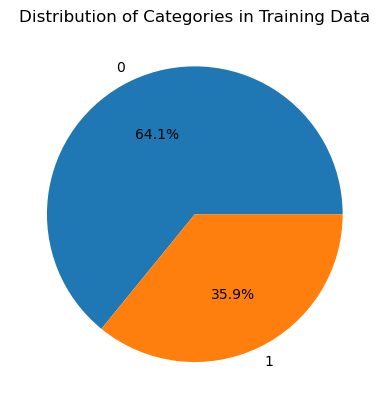

In [10]:
import matplotlib.pyplot as plt

# Count the number of occurrences of each category in the training data
train_counts = df_train["label"].value_counts()

# Plot the counts as a pie chart
fig, ax = plt.subplots()
ax.pie(train_counts, labels=train_counts.index, autopct='%1.1f%%')
ax.set_title("Distribution of Categories in Training Data")

plt.show()

# Text Preprocessing

In [11]:
df_train

,id,img,label,text
0,42953,img/42953.png,0,its their character not their color that matters
1,23058,img/23058.png,0,don't be afraid to love again everyone is not ...
2,13894,img/13894.png,0,putting bows on your pet
3,37408,img/37408.png,0,i love everything and everybody! except for sq...
4,82403,img/82403.png,0,"everybody loves chocolate chip cookies, even h..."
...,...,...,...,...
8495,10423,img/10423.png,1,nobody wants to hang auschwitz me
8496,98203,img/98203.png,1,when god grants you a child after 20 years of ...
8497,36947,img/36947.png,1,gays on social media: equality! body positivit...
8498,16492,img/16492.png,1,having a bad day? you could be a siamese twin ...


### filtering other language

In [12]:
import nltk

def english_word_filter(sent):
    words = set(nltk.corpus.words.words())

    #sent = "Io andiamo to the beach with my amico."
    #sent="Bonjour! Comment ça va? I'm doing well, thank you. What about you?"

    text=" ".join(w for w in nltk.wordpunct_tokenize(sent) \

             if w.lower() in words or not w.isalpha())
    
    return text

In [13]:
examples = ["Hola! I went to the marché to buy some fruits and vegetables",
"Je suis très fatigué today, I think I need a nap",
"Мой лучший друг is coming to visit me from Russia next week",
"Ich bin so aufgeregt! Tomorrow I'm going to see my favorite band live in concert",
"Mijn vrienden and I are planning a trip to Italy this summer",
"Jeg har lyst til å lære meg å spille gitar, it's been a dream of mine for years",
"Mi familia and I went to the beach for vacation last month, it was so much fun",
"O café da manhã is my favorite meal of the day, especially when I have some croissants",
"Ich spreche ein bisschen Deutsch, but I'm not very good at it yet",
"Mi hermano mayor is getting married next month, and I'm going to be the best man"]

for example in examples:
    filtered_text = english_word_filter(example)
    print(f"Original Text: {example}")
    print(f"Filtered Text: {filtered_text}")
    print("\n")

Original Text: Hola! I went to the marché to buy some fruits and vegetables
Filtered Text: ! I went to the to buy some and


Original Text: Je suis très fatigué today, I think I need a nap
Filtered Text: today , I think I need a nap


Original Text: Мой лучший друг is coming to visit me from Russia next week
Filtered Text: is coming to visit me from Russia next week


Original Text: Ich bin so aufgeregt! Tomorrow I'm going to see my favorite band live in concert
Filtered Text: Ich bin so ! Tomorrow I ' m going to see my favorite band live in concert


Original Text: Mijn vrienden and I are planning a trip to Italy this summer
Filtered Text: and I are a trip to this summer


Original Text: Jeg har lyst til å lære meg å spille gitar, it's been a dream of mine for years
Filtered Text: til , it ' s been a dream of mine for


Original Text: Mi familia and I went to the beach for vacation last month, it was so much fun
Filtered Text: Mi familia and I went to the beach for vacation last month

In [14]:
!pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 19.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=3405b7d0582bcb493ae242234de5b28caae17068fdca7ed6f757ef4f3b93bf4f
  Stored in directory: /root/.cache/pip/wheels/73/b2/db/0c9b9eb7a44bf85ec0b42c06ee617d0a0de66840dc0b3248d1
Successfully built langdetect


In [15]:
from langdetect import detect

def filter_english(text):
    """
    Function to remove non-English words from a text
    """
    words = text.split()
    english_words = [word for word in words if word.isalpha() and detect(word) == 'en']
    return " ".join(english_words)




In [16]:
examples = ["Hola! I went to the marché to buy some fruits and vegetables.",
"Je suis très fatigué today, I think I need a nap.",
"Мой лучший друг is coming to visit me from Russia next week.",
"Ich bin so aufgeregt! Tomorrow I'm going to see my favorite band live in concert.",
"Mijn vrienden and I are planning a trip to Italy this summer.",
"Jeg har lyst til å lære meg å spille gitar, it's been a dream of mine for years.",
"Mi familia and I went to the beach for vacation last month, it was so much fun.",
"O café da manhã is my favorite meal of the day, especially when I have some croissants.",
"Ich spreche ein bisschen Deutsch, but I'm not very good at it yet.",
"Mi hermano mayor is getting married next month, and I'm going to be the best man."]

for example in examples:
    filtered_text = filter_english(example)
    print(f"Original Text: {example}")
    print(f"Filtered Text: {filtered_text}")
    print("\n")


Original Text: Hola! I went to the marché to buy some fruits and vegetables.
Filtered Text: to the to and


Original Text: Je suis très fatigué today, I think I need a nap.
Filtered Text: think


Original Text: Мой лучший друг is coming to visit me from Russia next week.
Filtered Text: to from


Original Text: Ich bin so aufgeregt! Tomorrow I'm going to see my favorite band live in concert.
Filtered Text: Tomorrow to


Original Text: Mijn vrienden and I are planning a trip to Italy this summer.
Filtered Text: and to this


Original Text: Jeg har lyst til å lære meg å spille gitar, it's been a dream of mine for years.
Filtered Text: of


Original Text: Mi familia and I went to the beach for vacation last month, it was so much fun.
Filtered Text: and to the beach


Original Text: O café da manhã is my favorite meal of the day, especially when I have some croissants.
Filtered Text: of the when


Original Text: Ich spreche ein bisschen Deutsch, but I'm not very good at it yet.
Filtered Tex

In [17]:
!pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.8/101.8 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 13.6 MB/s eta 0:00:00


In [18]:
import re
from bs4 import BeautifulSoup
import contractions
import nltk
nltk.download('punkt')


# Define a function for text preprocessing
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text)
    
    # Remove HTML tags using BeautifulSoup
    soup = BeautifulSoup(text, 'html.parser')
    text = soup.get_text()
    
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    
    # Replace abbreviations with their full form using contractions package
    text = contractions.fix(text)
    
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    
    # Replace chat words with their full form
    chat_words_map = {
        "afaik": "as far as i know",
        "b4": "before",
        "b/c": "because",
        "btw": "by the way",
        "cya": "see you",
        "lol": "laugh out loud",
        "np": "no problem",
        "omg": "oh my god",
        "thx": "thanks",
        "ttyl": "talk to you later",
        "wtf": "what the fuck",
        "yolo": "you only live once",
        "brb": "be right back",
        "rofl": "rolling on the floor laughing",
        "gtg": "got to go",
        "ex":"previous girlfriend",
        "idk": "i do not know",
        "imo": "in my opinion"
    }
    
    words = text.split()
    new_words = []
    for word in words:
        if word.lower() in chat_words_map:
            new_words.append(chat_words_map[word.lower()])
        else:
            new_words.append(word)
    text = " ".join(new_words)
    
    return text

# Apply the function to the text in the dataframe
df_train['text'] = df_train['text'].apply(preprocess_text)
df_val['text'] = df_val['text'].apply(preprocess_text)

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


/opt/conda/lib/python3.7/site-packages/bs4/__init__.py:439: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  MarkupResemblesLocatorWarning


In [19]:
df_train.iloc[1]['text']

'do not be afraid to love again everyone is not like your previous girlfriend'

### Handling emoji 

In [20]:
import emoji

def convert_emoji_to_text(text):
    # Replace emojis with their textual representation
    text = emoji.demojize(text, delimiters=(" ", " "))
    
    # Remove the colons that separate emoji codepoints
    text = text.replace(":", "")
    text = text.replace("_", " ")
    
    return text


df_train['text'] = df_train['text'].apply(convert_emoji_to_text)
df_val['text'] = df_val['text'].apply(convert_emoji_to_text)

In [21]:
text_with_emoji = "I'm feeling 😊 today!"
text_without_emoji = convert_emoji_to_text(text_with_emoji)
print(text_without_emoji)


I'm feeling  smiling face with smiling eyes  today!


In [22]:
df_train.iloc[2]['text']

'putting bows on your pet'

### Lemmatization

In [23]:
import spacy

# Load the English language model
nlp = spacy.load('en_core_web_sm')

# Define a function to lemmatize text using spaCy
def lemmatize_text(text):
    doc = nlp(text)
    lemmatized_words = [token.lemma_ for token in doc]
    return ' '.join(lemmatized_words)
    
# Apply the lemmatization function to the 'text' column of the dataframe
df_train['text'] = df_train['text'].apply(lemmatize_text)
df_val['text'] = df_val['text'].apply(lemmatize_text)



### Tokenization

In [24]:
from nltk.tokenize import word_tokenize

df_train['tokenized_text'] = df_train['text'].apply(word_tokenize)
df_val['tokenized_text'] = df_val['text'].apply(word_tokenize)

In [25]:
df_train

,id,img,label,text,tokenized_text
0,42953,img/42953.png,0,its their character not their color that matter,"[its, their, character, not, their, color, tha..."
1,23058,img/23058.png,0,do not be afraid to love again everyone be not...,"[do, not, be, afraid, to, love, again, everyon..."
2,13894,img/13894.png,0,put bow on your pet,"[put, bow, on, your, pet]"
3,37408,img/37408.png,0,I love everything and everybody except for squ...,"[I, love, everything, and, everybody, except, ..."
4,82403,img/82403.png,0,everybody love chocolate chip cookie even hitler,"[everybody, love, chocolate, chip, cookie, eve..."
...,...,...,...,...,...
8495,10423,img/10423.png,1,nobody want to hang auschwitz I,"[nobody, want, to, hang, auschwitz, I]"
8496,98203,img/98203.png,1,when god grant you a child after 20 year of yo...,"[when, god, grant, you, a, child, after, 20, y..."
8497,36947,img/36947.png,1,gay on social medium equality body positivity ...,"[gay, on, social, medium, equality, body, posi..."
8498,16492,img/16492.png,1,have a bad day you could be a siamese twin att...,"[have, a, bad, day, you, could, be, a, siamese..."


In [26]:
df_train['label'].value_counts()

0    5450
1    3050
Name: label, dtype: int64

# Vectorization

## Using tf-idf 

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer object
vectorizer = TfidfVectorizer()

# Fit the vectorizer to the training data
vectorizer.fit(df_train['text'])

# Transform the training data into a sparse matrix of TF-IDF weights
X_train_tfidf = vectorizer.transform(df_train['text'])
X_val_tfidf = vectorizer.transform(df_val['text'])

In [28]:
df_train_tfidf = df_train.copy()
df_val_tfidf = df_val.copy()

In [29]:
# Add the TF-IDF sparse matrix as a new column in df_train
df_train_tfidf['tf_idf_matrix'] = list(X_train_tfidf)
df_val_tfidf['tf_idf_matrix'] = list(X_val_tfidf)

In [30]:
# temp_train = pd.DataFrame.sparse.from_spmatrix(X_train_tfidf)
# temp_val = pd.DataFrame.sparse.from_spmatrix(X_val_tfidf)

In [31]:
# df_train_tfidf = pd.concat([df_train_tfidf, temp_train], axis =1)
# df_val_tfidf = pd.concat([df_val_tfidf, temp_val], axis =1)

In [32]:
df_train_tfidf.shape

(8500, 6)

In [33]:
df_train_tfidf.to_csv("Train-Text-TFIDF-Embeddings.csv", index = False)
df_val_tfidf.to_csv("Val-Text-TFIDF-Embeddings.csv", index = False)

In [34]:
df_train_tfidf.iloc[2]['tf_idf_matrix']

<1x7301 sparse matrix of type '<class 'numpy.float64'>'
	with 5 stored elements in Compressed Sparse Row format>

In [35]:
df_train_tfidf.head()

,id,img,label,text,tokenized_text,tf_idf_matrix
0,42953,img/42953.png,0,its their character not their color that matter,"[its, their, character, not, their, color, tha...","(0, 6508)\t0.5497218895360637\n (0, 6502)\t..."
1,23058,img/23058.png,0,do not be afraid to love again everyone be not...,"[do, not, be, afraid, to, love, again, everyon...","(0, 7270)\t0.17498909697601167\n (0, 6600)\..."
2,13894,img/13894.png,0,put bow on your pet,"[put, bow, on, your, pet]","(0, 7270)\t0.2419409721304303\n (0, 5275)\t..."
3,37408,img/37408.png,0,I love everything and everybody except for squ...,"[I, love, everything, and, everybody, except, ...","(0, 6180)\t0.7526460821524202\n (0, 3950)\t..."
4,82403,img/82403.png,0,everybody love chocolate chip cookie even hitler,"[everybody, love, chocolate, chip, cookie, eve...","(0, 3950)\t0.27431318695484563\n (0, 3167)\..."


## Using fasttext

In [36]:
df_train_fasttext = df_train.copy()
df_val_fasttext = df_val.copy()

In [37]:
from gensim.models.fasttext import FastText

# train a FastText model on the tokenized text
ft_model = FastText(sentences=df_train['tokenized_text'], vector_size=100, window=5, min_count=5, workers=4)

# create a function to convert a list of tokens to a single vector using the trained FastText model
def text_to_vector(tokens):
    # create an empty array to store the vectors for each token
    token_vectors = np.empty((len(tokens), ft_model.vector_size))
    
    # iterate through each token and get its vector
    for i, token in enumerate(tokens):
        token_vectors[i] = ft_model.wv[token]
    
    # take the mean of all token vectors to get a single vector representing the text
    text_vector = token_vectors.mean(axis=0)
    
    return text_vector

# apply the text_to_vector function to the tokenized_text column to create a new column with text vectors
df_train_fasttext['fasttext_vectors'] = df_train['tokenized_text'].apply(text_to_vector)
df_val_fasttext['fasttext_vectors'] = df_val['tokenized_text'].apply(text_to_vector)



In [38]:
df_train_fasttext.to_csv("Train-Text-FastText-Embeddings.csv", index = False)
df_val_fasttext.to_csv("Val-Text-FastText-Embeddings.csv", index = False)

In [39]:
df_train_fasttext.iloc[2]['fasttext_vectors']

array([-0.08951545,  0.23368936, -0.34075743,  0.22202217,  0.17819223,
        0.26109985, -0.16419289,  0.54323612, -0.20649421, -0.37268901,
        0.31836779, -0.17700043,  0.02802842,  0.8436942 , -0.3403151 ,
       -0.59534284, -0.04907646,  0.0294734 , -0.08781813, -0.56547868,
       -0.40357053,  0.23566267, -0.29762257, -0.03998698, -0.34320195,
       -0.20671918, -0.73847712,  0.20514099,  0.27082934,  0.57951486,
       -0.31075139,  0.33445924,  0.6368479 , -0.13648455,  0.25300751,
        0.51470069, -0.37222989,  0.08280796, -0.45068952, -0.38010076,
        0.43231716, -0.60539572, -0.20042423, -0.36784196, -0.39544027,
       -0.368977  , -0.114219  , -0.25610808, -0.04693046, -0.07999913,
        0.2929501 , -0.14798237,  0.0382183 , -0.31185504, -0.04543571,
        0.02798627, -0.17626919, -0.028771  , -0.16649066, -0.09516658,
        0.2014171 , -0.48781596,  0.14802453,  0.86507431,  0.23627715,
        0.61765724,  0.2103854 ,  0.03459786, -0.29677499,  0.27